In [80]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By

from glob import glob
import os
import time
import random
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# 台灣五十

In [ ]:
# # 透過原始碼從證交所抓台灣五十指數及台灣五十報酬指數(已失效，會有錯誤資料)

# def put_data_in_list(date_list, tw50_list, tw50_return_list):
#     table = driver.find_element(by=By.CSS_SELECTOR, value="div[class='data-table']")
#     td_content = table.find_elements(by=By.TAG_NAME, value="td")

#     for idx, td in enumerate(td_content):
#         if (idx%3) == 0:
#             slash_idx = td.text.find('/')
#             date_list.append(str(int(td.text[:slash_idx])+1911) + td.text[slash_idx:])
#         if (idx%3) == 1:
#             tw50_list.append(float(td.text.replace(',','')))
#         if (idx%3) == 2:
#             tw50_return_list.append(float(td.text.replace(',','')))

# url = 'https://www.twse.com.tw/zh/page/trading/indices/TAI50I.html'
# path = '/Users/chungichien/Desktop/chromedriver'

# service = Service(path)
# options = webdriver.ChromeOptions()
# driver = webdriver.Chrome(service=service, options=options)

# driver.get(url)
# driver.maximize_window()
# select_yy = Select(driver.find_element(by=By.NAME, value='yy'))
# select_mm = Select(driver.find_element(by=By.NAME, value='mm'))

# date_list = []
# tw50_list = []
# tw50_return_list = []

# op_year_list = []
# for op in select_yy.options:
#     op_year_list.insert(0, op.text)

# op_month_list = []
# for op in select_mm.options:
#     op_month_list.append(op.text)

# for idx, yy in enumerate(op_year_list):
#     select_yy.select_by_visible_text(yy)
    
#     month_start = 0
#     month_end = 12
#     if idx == 0:
#         month_start = 9
#     if idx == (len(op_year_list) - 1):
#         month_end = 7   # 視最新月份決定，當時為七月
    
#     for mm in op_month_list[month_start:month_end]:
#         select_mm.select_by_visible_text(mm)
#         driver.find_element(by=By.CSS_SELECTOR, value="a[class='button search']").click()
        
#         # 點擊後等待一段時間，避免被ban掉
#         time.sleep(3)
        
#         put_data_in_list(date_list, tw50_list, tw50_return_list)

# driver.quit()


In [84]:
# 從證交所下載每月台灣五十指數及台灣五十報酬指數CSV檔，然後另行處理

url = 'https://www.twse.com.tw/zh/page/trading/indices/TAI50I.html'
path = '/Users/chungichien/Desktop/chromedriver'

service = Service(path)
options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=service, options=options)
driver.get(url)
time.sleep(3)
driver.maximize_window()

a = 1
b = 3
time.sleep(random.uniform(a,b))
select_yy = Select(driver.find_element(by=By.NAME, value='yy'))
select_mm = Select(driver.find_element(by=By.NAME, value='mm'))

op_year_list = []
for op in select_yy.options:
    op_year_list.insert(0, op.text)

op_month_list = []
for op in select_mm.options:
    op_month_list.append(op.text)

downloads_counter = 0
for idx, yy in enumerate(op_year_list):
    select_yy.select_by_visible_text(yy)
    time.sleep(random.uniform(a,b))
    
    month_start = 0
    month_end = 12
    if idx == 0:
        month_start = 9
    if idx == (len(op_year_list) - 1):
        month_end = 7   # 視最新月份決定，當時為七月
    
    for mm in op_month_list[month_start:month_end]:
        print('yy=', yy, 'mm=', mm)
        select_mm.select_by_visible_text(mm)
        time.sleep(random.uniform(a,b))
        driver.find_element(by=By.CSS_SELECTOR, value="a[class='button search']").click()
        time.sleep(random.uniform(a,b)+3)
        driver.find_element(by=By.CSS_SELECTOR, value="a[class='csv']").click()
        time.sleep(random.uniform(a,b)+1.5)
        downloads_counter += 1
    
    time.sleep(random.uniform(5,10))

driver.quit()

def date_trans(date):
    date = date.replace(date[0:3], str(int(date[0:3]) + 1911))
    return date

def get_data_from_file(path):
    month_data = pd.read_csv(path, thousands=",", encoding='big5')
    month_data = month_data.iloc[:,:3]
    month_data['日期'] = pd.to_datetime(month_data['日期'].apply(date_trans))
    month_data.set_index('日期', inplace=True)
    return month_data

TAI50_Pattern = '/Users/chungichien/Downloads/TAI50I*.csv'
TAI50_file_list = glob(TAI50_Pattern)
TAI50_file_time_list = []
for i in TAI50_file_list:
    file_time = pd.to_datetime(os.path.getmtime(i), unit='s')
    TAI50_file_time_list.append(file_time)
TAI50_file_name_list = list(pd.DataFrame([TAI50_file_time_list, TAI50_file_list]).transpose().sort_values(by=0)[1])

TAI50_complete_df = pd.DataFrame()
for name in TAI50_file_name_list:
    month_data = get_data_from_file(name)
    TAI50_complete_df = pd.concat([TAI50_complete_df, month_data])

TAI50_complete_df.columns = ['TW50', 'TW50TR']
TAI50_complete_df

yy= 民國 91 年 mm= 10月
yy= 民國 91 年 mm= 11月
yy= 民國 91 年 mm= 12月
yy= 民國 92 年 mm= 01月
yy= 民國 92 年 mm= 02月
yy= 民國 92 年 mm= 03月
yy= 民國 92 年 mm= 04月
yy= 民國 92 年 mm= 05月
yy= 民國 92 年 mm= 06月
yy= 民國 92 年 mm= 07月
yy= 民國 92 年 mm= 08月
yy= 民國 92 年 mm= 09月
yy= 民國 92 年 mm= 10月
yy= 民國 92 年 mm= 11月
yy= 民國 92 年 mm= 12月
yy= 民國 93 年 mm= 01月
yy= 民國 93 年 mm= 02月
yy= 民國 93 年 mm= 03月
yy= 民國 93 年 mm= 04月
yy= 民國 93 年 mm= 05月
yy= 民國 93 年 mm= 06月
yy= 民國 93 年 mm= 07月
yy= 民國 93 年 mm= 08月
yy= 民國 93 年 mm= 09月
yy= 民國 93 年 mm= 10月
yy= 民國 93 年 mm= 11月
yy= 民國 93 年 mm= 12月
yy= 民國 94 年 mm= 01月
yy= 民國 94 年 mm= 02月
yy= 民國 94 年 mm= 03月
yy= 民國 94 年 mm= 04月
yy= 民國 94 年 mm= 05月
yy= 民國 94 年 mm= 06月
yy= 民國 94 年 mm= 07月
yy= 民國 94 年 mm= 08月
yy= 民國 94 年 mm= 09月
yy= 民國 94 年 mm= 10月
yy= 民國 94 年 mm= 11月
yy= 民國 94 年 mm= 12月
yy= 民國 95 年 mm= 01月
yy= 民國 95 年 mm= 02月
yy= 民國 95 年 mm= 03月
yy= 民國 95 年 mm= 04月
yy= 民國 95 年 mm= 05月
yy= 民國 95 年 mm= 06月
yy= 民國 95 年 mm= 07月
yy= 民國 95 年 mm= 08月
yy= 民國 95 年 mm= 09月
yy= 民國 95 年 mm= 10月
yy= 民國 95 年 mm= 11月


,TW50,TW50TR
日期,,
2002-10-18,3409.79,3448.13
2002-10-21,3400.68,3438.92
2002-10-22,3323.56,3360.93
2002-10-23,3496.82,3536.14
2002-10-24,3483.31,3523.98
...,...,...
2022-07-18,11364.54,23478.68
2022-07-19,11310.70,23367.45
2022-07-20,11364.57,23490.83


<AxesSubplot:xlabel='日期'>

/Users/chungichien/opt/anaconda3/envs/quant/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chungichien/opt/anaconda3/envs/quant/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chungichien/opt/anaconda3/envs/quant/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/chungichien/opt/anaconda3/envs/quant/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


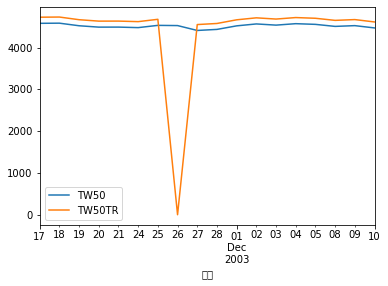

In [90]:
TAI50_complete_df['2003-11-15':'2003-12-10'].plot()

<AxesSubplot:xlabel='日期'>

/Users/chungichien/opt/anaconda3/envs/quant/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chungichien/opt/anaconda3/envs/quant/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chungichien/opt/anaconda3/envs/quant/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/chungichien/opt/anaconda3/envs/quant/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


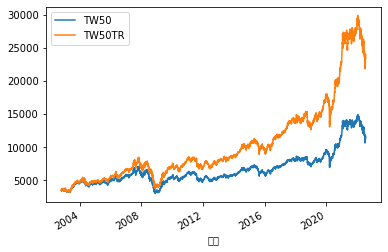

In [95]:
TAI50_complete_df.drop(index='2003-11-26').plot()

In [96]:
TAI50_complete_df.drop(index='2003-11-26').to_csv('./台灣指數資料.csv')

# 回測

## 台灣五十

In [ ]:
TW50_dataframe = TAI50_complete_df

TW50_record_high = []
TW50TR_record_high = []
for i in range(len(TW50_dataframe.TW50)):
    TW50_record_high.append(TW50_dataframe.TW50[TW50_dataframe.TW50[:i+1].idxmax()])
    TW50TR_record_high.append(TW50_dataframe.TW50TR[TW50_dataframe.TW50[:i+1].idxmax()])
TW50_dataframe['TW50_record_high'] = TW50_record_high
TW50_dataframe['TW50TR_record_high'] = TW50TR_record_high
TW50_dataframe['TW50_drawdown'] = 1 - (TW50_dataframe.TW50 / TW50_dataframe.TW50_record_high)
TW50_dataframe['TW50TR_drawdown'] = 1 - (TW50_dataframe.TW50TR / TW50_dataframe.TW50TR_record_high)

TW50_record_high_order = [0]
order = 0
for i in range(1, len(TW50_dataframe.TW50)):
    if TW50_dataframe.TW50_record_high[i] > TW50_dataframe.TW50_record_high[i-1]:
        order += 1
    TW50_record_high_order.append(order)
TW50_dataframe['TW50_record_high_order'] = TW50_record_high_order

In [5]:
print(TW50_dataframe[['TW50TR']])

              TW50TR
2002-10-18   3448.13
2002-10-21   3438.92
2002-10-22   3360.93
2002-10-23   3536.14
2002-10-24   3523.98
...              ...
2022-07-15  23253.11
2022-07-18  23478.68
2022-07-19  23367.45
2022-07-20  23490.83
2022-07-21  23884.72

[4869 rows x 1 columns]


In [ ]:
plt.plot(TW50_dataframe.TW50TR)

In [9]:
# TW50_dataframe.to_csv('./台灣指數資料.csv')

In [5]:
set(TW50_dataframe[TW50_dataframe.TW50_drawdown > 0.2].TW50_record_high_order)

{46, 86, 91, 141}

In [6]:
TW50_dataframe[(TW50_dataframe.TW50_record_high_order == 86) & (TW50_dataframe.TW50_drawdown > 0.2)].head(1)

,TW50,TW50TR,TW50_record_high,TW50TR_record_high,TW50_drawdown,TW50TR_drawdown,TW50_record_high_order
2008-01-07,5635.29,6726.32,7057.62,8424.02,0.201531,0.201531,86


In [7]:
TW50_dataframe[(TW50_dataframe.TW50_record_high_order == 86) & (TW50_dataframe.TW50_drawdown > 0.3)].head(1)

,TW50,TW50TR,TW50_record_high,TW50TR_record_high,TW50_drawdown,TW50TR_drawdown,TW50_record_high_order
2008-07-15,4878.79,5937.33,7057.62,8424.02,0.30872,0.29519,86


In [8]:
TW50_dataframe[(TW50_dataframe.TW50_record_high_order == 86) & (TW50_dataframe.TW50_drawdown > 0.4)].head(1)

,TW50,TW50TR,TW50_record_high,TW50TR_record_high,TW50_drawdown,TW50TR_drawdown,TW50_record_high_order
2008-10-06,4055.32,5098.12,7057.62,8424.02,0.425398,0.394812,86


In [9]:
TW50_dataframe[(TW50_dataframe.TW50_record_high_order == 86) & (TW50_dataframe.TW50_drawdown > 0.5)].head(1)

,TW50,TW50TR,TW50_record_high,TW50TR_record_high,TW50_drawdown,TW50TR_drawdown,TW50_record_high_order
2008-10-23,3446.62,4345.38,7057.62,8424.02,0.511646,0.484168,86


In [10]:
TW50_dataframe[(TW50_dataframe.TW50_record_high_order == 91) & (TW50_dataframe.TW50_drawdown > 0.2)].head(1)

,TW50,TW50TR,TW50_record_high,TW50TR_record_high,TW50_drawdown,TW50TR_drawdown,TW50_record_high_order
2015-08-21,5792.48,9223.7,7306.38,11252.89,0.207202,0.180326,91


In [11]:
TW50_dataframe[(TW50_dataframe.TW50_record_high_order == 141) & (TW50_dataframe.TW50_drawdown > 0.2)].head(1)

,TW50,TW50TR,TW50_record_high,TW50TR_record_high,TW50_drawdown,TW50TR_drawdown,TW50_record_high_order
2020-03-17,7461.55,14092.54,9546.54,17976.33,0.218403,0.21605,141


In [12]:
loss_20_1 = 6726.32
loss_30_1 = 5937.33
loss_40_1 = 5098.12
loss_50_1 = 4345.38
loss_max_1 = 3709.01

loss_20_2 = 9223.7
loss_max_2 = 8894.16

loss_20_3 = 14092.54
loss_max_3 = 13040.09

avg_cost_1 = loss_20_1*0.3 + loss_30_1*0.1 + loss_40_1*0.1 + loss_50_1*0.1
max_drawdown_1 = 0.6*(1 - (0.6*loss_max_1/avg_cost_1))

avg_cost_2 = loss_20_2*0.3
max_drawdown_2 = 0.3*(1 - (0.3*loss_max_2/avg_cost_2))

avg_cost_3 = loss_20_3*0.1
max_drawdown_3 = 0.1*(1 - (0.1*loss_max_3/avg_cost_3))

max_drawdown_1, max_drawdown_2, max_drawdown_3

(0.22450745631512445, 0.010718258399557656, 0.007468135623528483)

In [13]:
# 92年1月到96年1月台銀一年期定儲利率
interest_rate_92 = np.array([1.55, 1.425, 1.62, 2.02, 2.26])*0.01
# 97年1月開始台銀一年期定儲利率
interest_rate_97 = np.array([2.66, 0.945, 0.915, 1.21, 1.38, 1.38, 1.38, 1.38, 1.23, 1.07, 1.07, 1.07, 1.07, 0.79])*0.01

In [14]:
np.prod(1 + interest_rate_97[:7])

1.1028643092261075

In [15]:
np.prod(1 + interest_rate_97[:-3])

1.1561871479518007

In [16]:
# 從2008年開始入場起算(下跌20%投入三成，每多下跌10%再投入一成，其餘以定存計算)
np.exp(np.log(0.6*TW50_dataframe.TW50TR[-1]/avg_cost_1 + np.prod(1 + interest_rate_97[:7])*0.3*TW50_dataframe.TW50TR[-1]/avg_cost_2 + np.prod(1 + interest_rate_97[:-3])*0.1*TW50_dataframe.TW50TR[-1]/avg_cost_3) / 14.5) - 1

0.16673137320939047

In [17]:
# 從2008年開始入場起算(直接全部投入)
np.exp(np.log(TW50_dataframe.TW50TR[-1]/loss_20_1) / 14.5) - 1

0.09555548217234144

In [18]:
# 從2002年開始入場起算(下跌20%投入三成，每多下跌10%再投入一成，其餘以定存計算)
np.exp(np.log(np.prod(1 + interest_rate_92)*(0.6*TW50_dataframe.TW50TR[-1]/avg_cost_1 + np.prod(1 + interest_rate_97[:7])*0.3*TW50_dataframe.TW50TR[-1]/avg_cost_2 + np.prod(1 + interest_rate_97[:-3])*0.1*TW50_dataframe.TW50TR[-1]/avg_cost_3)) / 19.5) - 1

0.12656845649335136

In [19]:
# 從2002年開始入場起算(直接全部投入)
np.exp(np.log(TW50_dataframe.TW50TR[-1]/TW50_dataframe.TW50TR[0]) / 19.5) - 1

0.10752478491536577

## 標普500

In [20]:
SP500 = pdr.DataReader(name='^GSPC', data_source='yahoo', start='2002-10-01')
SP500TR = pdr.DataReader(name='^SP500TR', data_source='yahoo', start='2002-10-01')

SP500_data = {'SP500': SP500.Close, 'SP500TR':SP500TR.Close}
SP500_dataframe = pd.DataFrame(data=SP500_data, index=pd.to_datetime(SP500.index))

SP500_record_high = []
SP500TR_record_high = []
for i in range(len(SP500_dataframe.SP500)):
    SP500_record_high.append(SP500_dataframe.SP500[SP500_dataframe.SP500[:i+1].idxmax()])
    SP500TR_record_high.append(SP500_dataframe.SP500TR[SP500_dataframe.SP500[:i+1].idxmax()])
SP500_dataframe['SP500_record_high'] = SP500_record_high
SP500_dataframe['SP500TR_record_high'] = SP500TR_record_high
SP500_dataframe['SP500_drawdown'] = 1 - (SP500_dataframe.SP500 / SP500_dataframe.SP500_record_high)
SP500_dataframe['SP500TR_drawdown'] = 1 - (SP500_dataframe.SP500TR / SP500_dataframe.SP500TR_record_high)

SP500_record_high_order = [0]
order = 0
for i in range(1, len(SP500.Close)):
    if SP500_dataframe.SP500_record_high[i] > SP500_dataframe.SP500_record_high[i-1]:
        order += 1
    SP500_record_high_order.append(order)
SP500_dataframe['SP500_record_high_order'] = SP500_record_high_order

In [21]:
set(SP500_dataframe[SP500_dataframe.SP500_drawdown > 0.2].SP500_record_high_order)

{148, 403}

In [22]:
SP500_dataframe[(SP500_dataframe.SP500_record_high_order == 148) & (SP500_dataframe.SP500_drawdown > 0.2)].head(1)

,SP500,SP500TR,SP500_record_high,SP500TR_record_high,SP500_drawdown,SP500TR_drawdown,SP500_record_high_order
Date,,,,,,,
2008-07-09,1244.689941,1976.969971,1565.150024,2447.030029,0.204747,0.192094,148


In [23]:
SP500_dataframe[(SP500_dataframe.SP500_record_high_order == 148) & (SP500_dataframe.SP500_drawdown > 0.3)].head(1)

,SP500,SP500TR,SP500_record_high,SP500TR_record_high,SP500_drawdown,SP500TR_drawdown,SP500_record_high_order
Date,,,,,,,
2008-10-06,1056.890015,1687.339966,1565.150024,2447.030029,0.324736,0.310454,148


In [24]:
SP500_dataframe[(SP500_dataframe.SP500_record_high_order == 148) & (SP500_dataframe.SP500_drawdown > 0.4)].head(1)

,SP500,SP500TR,SP500_record_high,SP500TR_record_high,SP500_drawdown,SP500TR_drawdown,SP500_record_high_order
Date,,,,,,,
2008-10-09,909.919983,1453.52002,1565.150024,2447.030029,0.418637,0.406006,148


In [25]:
SP500_dataframe[(SP500_dataframe.SP500_record_high_order == 148) & (SP500_dataframe.SP500_drawdown > 0.5)].head(1)

,SP500,SP500TR,SP500_record_high,SP500TR_record_high,SP500_drawdown,SP500TR_drawdown,SP500_record_high_order
Date,,,,,,,
2008-11-20,752.440002,1206.040039,1565.150024,2447.030029,0.519254,0.507141,148


In [26]:
SP500_dataframe[(SP500_dataframe.SP500_record_high_order == 403) & (SP500_dataframe.SP500_drawdown > 0.2)].head(1)

,SP500,SP500TR,SP500_record_high,SP500TR_record_high,SP500_drawdown,SP500TR_drawdown,SP500_record_high_order
Date,,,,,,,
2020-03-12,2480.639893,5051.970215,3386.149902,6886.470215,0.267416,0.266392,403


In [27]:
SP500_dataframe[(SP500_dataframe.SP500_record_high_order == 403) & (SP500_dataframe.SP500_drawdown > 0.3)].head(1)

,SP500,SP500TR,SP500_record_high,SP500TR_record_high,SP500_drawdown,SP500TR_drawdown,SP500_record_high_order
Date,,,,,,,
2020-03-20,2304.919922,4697.089844,3386.149902,6886.470215,0.31931,0.317925,403


In [28]:
loss_20_1 = 1976.969971
loss_30_1 = 1687.339966
loss_40_1 = 1453.520020
loss_50_1 = 1206.040039
loss_max_1 = 1095.040039	

loss_20_2 = 5051.970215
loss_30_2 = 4697.089844
loss_max_2 = 4559.500000

avg_cost_1 = loss_20_1*0.3 + loss_30_1*0.1 + loss_40_1*0.1 + loss_50_1*0.1
max_drawdown_1 = 0.6*(1 - (0.6*loss_max_1/avg_cost_1))

avg_cost_2 = loss_20_2*0.3 + loss_30_2*0.1
max_drawdown_2 = 0.4*(1 - (0.4*loss_max_2/avg_cost_2))

max_drawdown_1, max_drawdown_2

(0.2164412297774873, 0.03253917189786653)

In [29]:
# 91年7月到96年7月台銀一年期定儲利率
interest_rate_91 = np.array([2.15, 1.425, 1.425, 1.82, 2.16, 2.54])*0.01
# 97年7月開始台銀一年期定儲利率
interest_rate_97 = np.array([2.76, 0.795, 1.04, 1.38, 1.38, 1.38, 1.38, 1.38, 1.07, 1.07, 1.07, 1.07, 0.79, 0.79])*0.01

In [30]:
np.prod(1 + interest_rate_91)

1.1208195402350487

In [31]:
np.prod(1 + interest_rate_97[:-1])

1.178757217083611

In [32]:
# 從2008年開始入場起算(下跌20%投入三成，每多下跌10%再投入一成，其餘以定存計算)
np.exp(np.log(0.6*SP500_dataframe.SP500TR[-1]/avg_cost_1 + np.prod(1 + interest_rate_97[:-1])*0.4*SP500_dataframe.SP500TR[-1]/avg_cost_2) / 14) - 1

0.15143146527195595

In [33]:
# 從2008年開始入場起算(直接全部投入)
np.exp(np.log(SP500_dataframe.SP500TR[-1]/loss_20_1) / 14) - 1

0.1122515941476272

In [34]:
# 從2002年開始入場起算(下跌20%投入三成，每多下跌10%再投入一成，其餘以定存計算)
np.exp(np.log(np.prod(1 + interest_rate_91)*(0.6*SP500_dataframe.SP500TR[-1]/avg_cost_1 + np.prod(1 + interest_rate_97[:-1])*0.4*SP500_dataframe.SP500TR[-1]/avg_cost_2)) / 20) - 1

0.11005232295455936

In [35]:
# 從2002年開始入場起算(直接全部投入)
np.exp(np.log(SP500_dataframe.SP500TR[-1]/SP500_dataframe.SP500TR[0]) / 20) - 1

0.10627321176307158

# 結論

以可得樣本期間(西元2002年或民國91年後)來看，危機入市的報酬(相較歷史高點下跌20%投入三成，每多下跌10%再投入一成，其餘以定存計算)較直接投入來得高，若不考慮匯率因素，台灣五十又比標普五百來得高(年化報酬分別約12%和11%)。